<a href="https://colab.research.google.com/github/D1VORY/pruning_neural_networks/blob/main/prunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras import  losses

In [ ]:
model  = keras.models.load_model('/content/drive/My Drive/datasets/birds/models/v2/birdModel.h5')


In [ ]:
model.load_weights('/content/drive/My Drive/datasets/birds/models/v2/birdModelWeights.h5')

In [ ]:
model.layers[2].trainable_weights

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 128)     204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 220, 220, 128)     512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 256)     295168    
_________________________________________________________________
batch_normalization_2 (Batch (None, 108, 108, 256)     1

In [ ]:
x_test = np.load('/content/drive/My Drive/datasets/birds/x_test2.npy')
y_test = np.load('/content/drive/My Drive/datasets/birds/y_test2.npy')

x_test, y_test = shuffle(x_test, y_test)
x_test = x_test / 255

In [ ]:
preds = model.evaluate(x_test, y_test)
### END CODE HERE ###

print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

7/7 [==============================] - 38s 378ms/step - loss: 0.7088 - accuracy: 0.8800
Loss = 0.7087731957435608
Test Accuracy = 0.8799999952316284


In [ ]:
model.layers[23].get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'dtype': 'float32',
 'filters': 128,
 'groups': 1,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'kernel_size': (5, 5),
 'name': 'conv2d_1',
 'padding': 'valid',
 'strides': (1, 1),
 'trainable': True,
 'use_bias': True}

In [ ]:
w = model.get_weights()

In [ ]:
len(w)

In [ ]:
for a in w:
    print(a.shape)

In [ ]:
type(w)

list

In [ ]:
#weights_m=model.get_weights()
for layer in model.layers:
    for w in layer.get_weights():
        print(f"{layer.name}: {w.shape}")

conv2d: (3, 3, 3, 64)
conv2d: (64,)
batch_normalization: (64,)
batch_normalization: (64,)
batch_normalization: (64,)
batch_normalization: (64,)
conv2d_1: (5, 5, 64, 128)
conv2d_1: (128,)
batch_normalization_1: (128,)
batch_normalization_1: (128,)
batch_normalization_1: (128,)
batch_normalization_1: (128,)
conv2d_2: (3, 3, 128, 256)
conv2d_2: (256,)
batch_normalization_2: (256,)
batch_normalization_2: (256,)
batch_normalization_2: (256,)
batch_normalization_2: (256,)
conv2d_3: (1, 1, 256, 128)
conv2d_3: (128,)
batch_normalization_3: (128,)
batch_normalization_3: (128,)
batch_normalization_3: (128,)
batch_normalization_3: (128,)
conv2d_4: (5, 5, 128, 512)
conv2d_4: (512,)
batch_normalization_4: (512,)
batch_normalization_4: (512,)
batch_normalization_4: (512,)
batch_normalization_4: (512,)
conv2d_5: (3, 3, 512, 256)
conv2d_5: (256,)
batch_normalization_5: (256,)
batch_normalization_5: (256,)
batch_normalization_5: (256,)
batch_normalization_5: (256,)
conv2d_6: (3, 3, 256, 128)
conv2d_6: 

In [ ]:
w = np.array(w)

In [ ]:
b = model.layers[3]

In [ ]:
b.get

In [ ]:
model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'name': 'conv2d_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Conv2D',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 224, 224, 3),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'dtype': 'float32',
    'filters': 64,
    'groups': 1,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'kernel_size': (3, 3),
    'name': 'conv2d',
    'padding': 'same',
    'strides': (1, 1),
    'trainable': True,
    'use_bias': True}},
  {'class_name': 'BatchNormalization',
   'config': {'axis': ListWrapper([3]),
    'beta_constraint': None,
    'beta_init

In [ ]:
class RebuildModel:
    def __init__(self):
        self.model_weights = []
        self.model_config = [] 

    def add_layer(self,weights, config):
        self.model_weights.append(weights)
        self.model_config.append(config)

    
        

In [ ]:
class Prunning:
    def __init__(self, model, percent_to_prune = 0.1):
        self.init_model = model
        self.layers = self.init_model.layers
        self.layers_num = len(self.init_model.layers)
        self.conv_layers_indices = self.get_conv_layers_indices()
        assert ((percent_to_prune > 0) and (percent_to_prune <1)), 'the percentage of filters to prune should be greater than 0 and less than 1'
        
        self.percent_to_prune = percent_to_prune

        self.layers_weights = self.get_layers_info()
        self.model_config = self.init_model.get_config()
        
    def get_layers_info(self):
        layers_weights = dict()
        for layer in self.layers:
            layers_weights[layer.name] = layer.get_weights()
        return layers_weights
    
    def find_config_index_by_name(self, name):
        for i in range(len(self.model_config['layers'])):
            if self.model_config['layers'][i]['config']['name'] == name:
                return i

    def get_conv_layers_indices(self):
        """
        returns list of indices of convolutional layers in model
        """
        res = []
        for i,layer in enumerate(self.layers):
            #print(layer.name)
            if 'conv2d' in layer.name:
                res.append(i)

        return res

    def sum_of_absolute_kernel_weights(self, kernel:np.ndarray):
        """
        calculate the sum of its absolute kernel weights
        """
        return np.sum(np.abs(kernel))

    def sum_of_filter(self,_filter):
        """
        calculate the sum of the sum of absolute kernel weights
        on a filter
        """
        res = np.zeros(shape=(_filter.shape[-1]))
        for i in range(_filter.shape[-1]):
            res[i] = self.sum_of_absolute_kernel_weights(_filter[:,:,i])
        return np.sum(res)

    def prune_filters(self, m:int, axis:int, indeces_to_prune:np.ndarray, weights:np.ndarray):
        """
        deletes m filters along given axis that correspond to indices in weights matrix 
        """
        pruned_weights = np.delete(weights, indeces_to_prune, axis=axis)
        return pruned_weights

    def assign_weights(self,layer_name, weights):
        """
        assigns weights and set new number of filters for layer
        """
        self.layers_weights[layer_name] = weights
        

    def assign_filters_num(self, layer_name, new_filters_num):
        layer_config_index = self.find_config_index_by_name(layer_name)
        self.model_config['layers'][layer_config_index]['config']['filters'] = new_filters_num
        #self.layers_configs[layer_name]['filters'] = new_filters_num


    def process_conv_layer(self, layer_index: int, next_conv_layer_index:int = None):
        layer =  self.layers[layer_index]
        all_weights = self.layers_weights[layer.name]
        weights = all_weights[0]
        biases = all_weights[1]

        output_depth = weights.shape[3]

        sum_of_weights = np.zeros(shape=(output_depth))
        for j in range(output_depth):
            sum_of_weights[j] = self.sum_of_filter(weights[:,:,:,j])
        sorted_indeces = np.argsort(sum_of_weights)

        m = int(output_depth * self.percent_to_prune)
        resulted_filters_num =  output_depth -  m
        indeces_to_prune = sorted_indeces[:m]

        pruned_weights = self.prune_filters(m, 3, indeces_to_prune, weights)
        pruned_biases = self.prune_filters(m, 0, indeces_to_prune, biases)

        self.assign_weights(layer.name, [pruned_weights, pruned_biases])
        self.assign_filters_num(layer.name, resulted_filters_num)

        self.remove_corresponding_channels_until_next_conv(m, resulted_filters_num,indeces_to_prune, layer_index + 1,next_conv_layer_index)

        #prune 3 channel of next conv layer
        if next_conv_layer_index is not None:
            next_conv_layer = self.layers[next_conv_layer_index]
            all_weights = self.layers_weights[next_conv_layer.name]
            weights = all_weights[0]
            biases = all_weights[1]

            weights = self.prune_filters(m, 2, indeces_to_prune, weights)
            self.assign_weights(next_conv_layer.name, [weights, biases])   



    def print_model_weights_shape(self):
        for lname, lweights in self.layers_weights.items():
            for w in lweights:
                print(f"{lname}: {w.shape}")
 

    def remove_corresponding_channels_until_next_conv(self, m, new_filters_num, indeces_to_prune, start_index, stop_index):
        """
        removes corresponding weights in following layers until stop index
        """
        print(f'corresponding: start:{start_index}  end:{stop_index}')
        if stop_index is None:
            #conv layers ended and we should just prune next layer
            for i in range(start_index, len(self.layers)):
                #find first dense layer after conv layers
                if 'dense' in self.layers[i].name:
                    stop_index = i+1
                    break
             
        for i in range(start_index, stop_index):
            #prune non conv layers
            layer = self.layers[i]
            class_name = self.init_model.get_config()['layers'][i+1]['class_name']
            #print(f'i: {i}, class name: {class_name}, layer name: {layer.name}')

            if class_name == 'BatchNormalization':
                new_weights =[self.prune_filters(m,0,indeces_to_prune,old_w) for old_w in self.layers_weights[layer.name]]
                self.assign_weights(layer.name, new_weights)

            elif class_name == 'Dense':
                all_weights = self.layers_weights[layer.name]
                input = all_weights[0]
                output = all_weights[1]
                new_input = self.prune_filters(m, 0, indeces_to_prune,input)
                self.assign_weights(layer.name, [new_input, output])

    def prepare_weights(self):
        res = []
        for layer in self.layers:
            for w in self.layers_weights[layer.name]:
                res.append(w)
        return res

    def return_new_pruned_model(self):
        new_model = keras.Sequential.from_config(self.model_config)
        prepared_weights = self.prepare_weights()
        new_model.set_weights(prepared_weights)
        return new_model

    def prune_model(self):
        #1. for each conv layer:
        #2. calculate the sum of its absolute kernel
#знайти суму абсолютних ваг в 5х5 фільтрі і записати в масив n x m
#де n вхідна розмірність глибини, m - вихідна
#Далі посортувати цю матрицю  (хз пока як)
# вибрати якусь кількість фільтрів з найменшою суммою і видалити їх з конв шару(
#     видаляєм j фільтр з вхідної матриці ваг і видаляєм j матрицю з вихідного шару
# )
        
        # fst, snd = self.conv_layers_indices[1:3]
        # print(fst, snd)
        # self.process_conv_layer(fst, snd)
        
        for i in range(len(self.conv_layers_indices)):
            #print(f'iteration: {i}')
            try:
                self.process_conv_layer(self.conv_layers_indices[i],self.conv_layers_indices[i+1])
            except IndexError:
                self.process_conv_layer(self.conv_layers_indices[i], None)

        return self.return_new_pruned_model()

# ЯКШО ДВА КОНВ ШАРИ ІДУТЬ ПІДРЯД, ТО НА НАСТУПНОМУ ОБРІЗАЄМО 2 ОСТАННІ КАНАЛИ


In [ ]:
prun = Prunning(model, percent_to_prune=0.1)
prun.conv_layers_indices

[0, 2, 5, 8, 12, 15, 18]

In [ ]:
prun.conv_layers_indices

[0, 2, 5, 8, 12, 15, 18]

In [ ]:
prun.print_model_weights_shape()

conv2d: (3, 3, 3, 64)
conv2d: (64,)
batch_normalization: (64,)
batch_normalization: (64,)
batch_normalization: (64,)
batch_normalization: (64,)
conv2d_1: (5, 5, 64, 128)
conv2d_1: (128,)
batch_normalization_1: (128,)
batch_normalization_1: (128,)
batch_normalization_1: (128,)
batch_normalization_1: (128,)
conv2d_2: (3, 3, 128, 256)
conv2d_2: (256,)
batch_normalization_2: (256,)
batch_normalization_2: (256,)
batch_normalization_2: (256,)
batch_normalization_2: (256,)
conv2d_3: (1, 1, 256, 128)
conv2d_3: (128,)
batch_normalization_3: (128,)
batch_normalization_3: (128,)
batch_normalization_3: (128,)
batch_normalization_3: (128,)
conv2d_4: (5, 5, 128, 512)
conv2d_4: (512,)
batch_normalization_4: (512,)
batch_normalization_4: (512,)
batch_normalization_4: (512,)
batch_normalization_4: (512,)
conv2d_5: (3, 3, 512, 256)
conv2d_5: (256,)
batch_normalization_5: (256,)
batch_normalization_5: (256,)
batch_normalization_5: (256,)
batch_normalization_5: (256,)
conv2d_6: (3, 3, 256, 128)
conv2d_6: 

In [ ]:
new_m = prun.prune_model()

corresponding: start:1  end:2
corresponding: start:3  end:5
corresponding: start:6  end:8
corresponding: start:9  end:12
corresponding: start:13  end:15
corresponding: start:16  end:18
corresponding: start:19  end:None


In [ ]:
new_m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 58)      1624      
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 58)      232       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 116)     168316    
_________________________________________________________________
batch_normalization_1 (Batch (None, 220, 220, 116)     464       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 116)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 231)     241395    
_________________________________________________________________
batch_normalization_2 (Batch (None, 108, 108, 231)     9

In [ ]:
x_train = np.load('/content/drive/My Drive/datasets/birds/x_train2.npy')
y_train = np.load('/content/drive/My Drive/datasets/birds/y_train2.npy')
x_valid = np.load('/content/drive/My Drive/datasets/birds/x_valid2.npy')
y_valid = np.load('/content/drive/My Drive/datasets/birds/y_valid2.npy')

x_valid = x_valid / 255
x_valid, y_valid = shuffle(x_valid, y_valid) 
x_train = x_train / 255

x_train, y_train = shuffle(x_train, y_train) 

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)


x_train shape =  (5391, 224, 224, 3)
y_train shape =  (5391,)

x_test shape =  (200, 224, 224, 3)
y_test shape =  (200,)


In [ ]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = new_m.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_valid,y_valid),  callbacks=[es_callback])

Epoch 1/5
85/85 [==============================] - 80s 937ms/step - loss: 0.1614 - accuracy: 0.9544 - val_loss: 1.0749 - val_accuracy: 0.7950
Epoch 2/5
85/85 [==============================] - 80s 946ms/step - loss: 0.1587 - accuracy: 0.9564 - val_loss: 1.0233 - val_accuracy: 0.8000
Epoch 3/5
85/85 [==============================] - 81s 947ms/step - loss: 0.1547 - accuracy: 0.9579 - val_loss: 0.9546 - val_accuracy: 0.8600
Epoch 4/5
85/85 [==============================] - 80s 946ms/step - loss: 0.1470 - accuracy: 0.9559 - val_loss: 1.0397 - val_accuracy: 0.8350
Epoch 5/5
85/85 [==============================] - 80s 945ms/step - loss: 0.1260 - accuracy: 0.9638 - val_loss: 0.8800 - val_accuracy: 0.8150


In [ ]:
new_m.compile(optimizer='adam' ,loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
preds = new_m.evaluate(x_test, y_test)
### END CODE HERE ###

print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

7/7 [==============================] - 1s 95ms/step - loss: 0.6794 - accuracy: 0.9171
Loss = 0.7041952610015869
Test Accuracy = 0.9049999713897705


In [ ]:
prun.print_model_weights_shape()

conv2d: (3, 3, 3, 39)
conv2d: (39,)
batch_normalization: (39,)
batch_normalization: (39,)
batch_normalization: (39,)
batch_normalization: (39,)
conv2d_1: (5, 5, 39, 77)
conv2d_1: (77,)
batch_normalization_1: (77,)
batch_normalization_1: (77,)
batch_normalization_1: (77,)
batch_normalization_1: (77,)
conv2d_2: (3, 3, 77, 154)
conv2d_2: (154,)
batch_normalization_2: (154,)
batch_normalization_2: (154,)
batch_normalization_2: (154,)
batch_normalization_2: (154,)
conv2d_3: (1, 1, 154, 77)
conv2d_3: (77,)
batch_normalization_3: (77,)
batch_normalization_3: (77,)
batch_normalization_3: (77,)
batch_normalization_3: (77,)
conv2d_4: (5, 5, 77, 308)
conv2d_4: (308,)
batch_normalization_4: (308,)
batch_normalization_4: (308,)
batch_normalization_4: (308,)
batch_normalization_4: (308,)
conv2d_5: (3, 3, 308, 154)
conv2d_5: (154,)
batch_normalization_5: (154,)
batch_normalization_5: (154,)
batch_normalization_5: (154,)
batch_normalization_5: (154,)
conv2d_6: (3, 3, 154, 77)
conv2d_6: (77,)
batch_nor

In [ ]:
prun.model_config

In [ ]:
prepared_weights = prun.prepare_weights()

In [ ]:
len(prepared_weights)

50

In [ ]:
for a in prepared_weights:
    print(a.shape)

In [ ]:
new_model = prun.return_new_pruned_model()

In [ ]:
new_model.summary()

In [ ]:
new_model.compile(optimizer='adam' ,loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
preds = new_model.evaluate(x_test, y_test)
### END CODE HERE ###

print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

7/7 [==============================] - 4s 221ms/step - loss: 4.6022 - accuracy: 0.1234
Loss = 4.80044412612915
Test Accuracy = 0.11999999731779099


In [ ]:
prune_percents = np.arange(0.05,1,0.05, dtype=np.float32)

In [ ]:
prune_percents 

array([0.05      , 0.1       , 0.15      , 0.2       , 0.25      ,
       0.3       , 0.35000002, 0.4       , 0.45000002, 0.5       ,
       0.55      , 0.6       , 0.65000004, 0.70000005, 0.75      ,
       0.8       , 0.85      , 0.90000004, 0.95000005], dtype=float32)

In [ ]:
res_accuracies = []

for percent in prune_percents:
    prun = Prunning(model, percent)
    new_model = prun.prune_model()

    new_model.compile(optimizer='adam' ,loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
    preds = new_model.evaluate(x_test, y_test)

    print (f"Percent:{percent} Test Accuracy = {preds[1]}")
    res_accuracies.append(preds[1])

print('=======================================================')

corresponding: start:1  end:2
corresponding: start:3  end:5
corresponding: start:6  end:8
corresponding: start:9  end:12
corresponding: start:13  end:15
corresponding: start:16  end:18
corresponding: start:19  end:None
7/7 [==============================] - 6s 446ms/step - loss: 0.4573 - accuracy: 0.9151
Percent:0.05000000074505806 Test Accuracy = 0.8899999856948853
corresponding: start:1  end:2
corresponding: start:3  end:5
corresponding: start:6  end:8
corresponding: start:9  end:12
corresponding: start:13  end:15
corresponding: start:16  end:18
corresponding: start:19  end:None
7/7 [==============================] - 1s 98ms/step - loss: 0.4451 - accuracy: 0.8840
Percent:0.10000000149011612 Test Accuracy = 0.8700000047683716
corresponding: start:1  end:2
corresponding: start:3  end:5
corresponding: start:6  end:8
corresponding: start:9  end:12
corresponding: start:13  end:15
corresponding: start:16  end:18
corresponding: start:19  end:None
7/7 [==============================] - 6s 39

In [ ]:
res_accuracies

[0.8899999856948853,
 0.8700000047683716,
 0.8299999833106995,
 0.7200000286102295,
 0.5400000214576721,
 0.3149999976158142,
 0.1850000023841858,
 0.11999999731779099,
 0.07000000029802322,
 0.03999999910593033,
 0.03500000014901161,
 0.029999999329447746,
 0.02500000037252903,
 0.02500000037252903,
 0.02500000037252903,
 0.02500000037252903,
 0.02500000037252903,
 0.02500000037252903,
 0.02500000037252903]

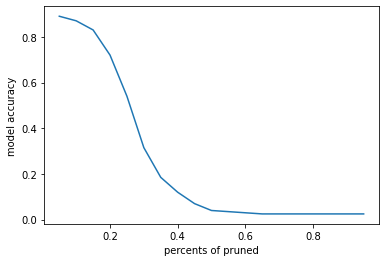

In [ ]:
plt.plot(prune_percents, res_accuracies)
plt.xlabel('percents of pruned')
plt.ylabel('model accuracy')
plt.draw()